In [51]:
!pip install spacy
!pip install penman
!pip install pdfminer.six


[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip
^C

[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
!pip install amrlib

     -------------------------------------- 354.2/354.2 kB 7.3 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for smatch: filename=smatch-1.0.4-py3-none-any.whl size=24108 sha256=b9eba53cff20109d14cb605ddbb02825133cd246d8e7afaf44a9d4227fd61257
  Stored in directory: c:\users\muppa\appdata\local\pip\cache\wheels\9e\98\00\520dea2147833b4a6a1018ee1d70678b8570de008c0a6928fb
Successfully built smatch

[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('punkt')

from gensim.models import Word2Vec
import numpy as np
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import seaborn as sns

from pdfminer.high_level import extract_text
import penman 
import amrlib

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\muppa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\muppa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
proj_lines = [i.strip() for i in open("../data/projs.txt", "r").readlines()]
vectorizer = TfidfVectorizer()
vect = vectorizer.fit_transform(proj_lines)
print(vectorizer.get_feature_names())
print(vect.toarray())

['10', '2022', 'analysis', 'and', 'ann', 'answer', 'answering', 'application', 'arizona', 'artical', 'artificial', 'aspect', 'asr', 'automatic', 'banks', 'based', 'captioning', 'carolina', 'cell', 'chatbot', 'conditions', 'connection', 'created', 'crime', 'crisis', 'damaged', 'data', 'dataset', 'detecting', 'diabetes', 'doc', 'doctor', 'election', 'elections', 'entity', 'events', 'evolving', 'extracting', 'faq', 'fasttext', 'firearm', 'foods', 'for', 'from', 'gubernatorial', 'image', 'improve', 'in', 'mississippi', 'models', 'neighborhoods', 'networks', 'neural', 'new', 'nlp', 'novel', 'of', 'on', 'one', 'ones', 'ongoing', 'perovskite', 'predicting', 'prediction', 'procedure', 'publications', 'quesries', 'question', 'rating', 'recognition', 'recommendation', 'regarding', 'regulation', 'regulations', 'scientific', 'sentiment', 'services', 'severity', 'short', 'solar', 'south', 'specialist', 'speech', 'state', 'summarization', 'summary', 'synthesis', 'system', 'target', 'techniques', 'te

In [ ]:
proj_lines

['Water - South Carolina',
 'Evolving Firearm Regulations',
 'Crime analysis in South Carolina',
 'Target aspect based sentiment analysis for urban neighborhoods',
 'Extracting synthesis procedure from solar cell perovskite based scientific publications.',
 'Entity Recognition : Water Data Regulations',
 "TOS: Banks' Terms of Services summary",
 'Water Regulation Summarization',
 'Predicting the 2022 gubernatorial election of South Carolina using sentiment analysis of Twitter.',
 'Scientific Artical Summarization',
 'New FastText [with Election data]',
 'Chatbot to answer quesries regarding WHO Water Regulations',
 'Verifying various foods connection to improve diabetes using NLP techniques',
 'Summarization of Terms and conditions',
 'Chatbot for Elections FAQ - State of Mississippi',
 'Image Captioning using Transformer Models',
 'Specialist Doctor Recommendation System',
 'Application of Artificial Neural Networks (ANN) to Automatic Speech Recognition (ASR) on a Novel Dataset create

In [ ]:
myproj = proj_lines[11]
myproj

'Chatbot to answer quesries regarding WHO Water Regulations'

In [ ]:
for i in range(0, len(proj_lines)):
    similarity = cosine_similarity(vect[11], vect[i])[0][0]
    print (f"Similarity with project {i+1}: {round(similarity,2)}")

Similarity with project 1: 0.14
Similarity with project 2: 0.13
Similarity with project 3: 0.0
Similarity with project 4: 0.0
Similarity with project 5: 0.0
Similarity with project 6: 0.21
Similarity with project 7: 0.0
Similarity with project 8: 0.13
Similarity with project 9: 0.0
Similarity with project 10: 0.0
Similarity with project 11: 0.0
Similarity with project 12: 1.0
Similarity with project 13: 0.08
Similarity with project 14: 0.0
Similarity with project 15: 0.13
Similarity with project 16: 0.0
Similarity with project 17: 0.0
Similarity with project 18: 0.06
Similarity with project 19: 0.0
Similarity with project 20: 0.28
Similarity with project 21: 0.0
Similarity with project 22: 0.0


Cluster 1: ['Water - South Carolina', 'Crime analysis in South Carolina', 'Predicting the 2022 gubernatorial election of South Carolina using sentiment analysis of Twitter.']
Cluster 2: ['Water - South Carolina', 'Entity Recognition : Water Data Regulations', 'Chatbot to answer quesries regarding WHO Water Regulations', 'Water Regulations - Arizona']


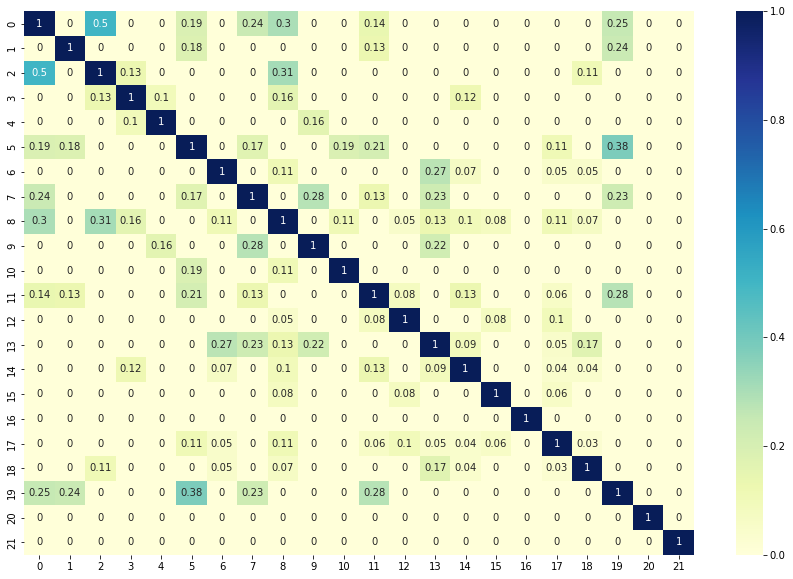

In [ ]:
sim_mat = []
for i in range(len(proj_lines)):
    temp = []
    for j in range(len(proj_lines)):
        temp.append(round(cosine_similarity(vect[i], vect[j])[0][0],2) )
    sim_mat.append(temp)

# visualize sim_mat in 2d format
fig,ax = plt.subplots(figsize=(15,10))
sns.heatmap(sim_mat, annot=True, cmap="YlGnBu")

count = 0
for i in range(len(sim_mat)):
    temp = []
    for j in range(len(sim_mat[i])):
    
        if i == j:
            break
    
        if sim_mat[i][j] >= 0.25:
            temp.append(proj_lines[j])
    
    if len(temp) > 1:
        count += 1
        temp.append(proj_lines[i])
        print(f'Cluster {count}: {temp}')

In [54]:
var = extract_text("../data/Resume_Bharath.pdf")
texts = var.split("\n")
texts = [i for i in texts if len(i)>2]
corpus2 = [nltk.word_tokenize(i) for i in texts]

In [55]:
# train model
model = Word2Vec(corpus2, min_count=1)
# summarize the loaded model
print("INFO: Model - \n" + str(model))

INFO: Model - 
Word2Vec<vocab=229, vector_size=100, alpha=0.025>


In [56]:
# summarize vocabulary
words = list(model.wv.index_to_key)
print(str(words))

[',', 'in', 'of', '.', '(', ')', ':', 'and', 'a', 'A', 'the', '•', 'with', 'for', 'Smart', 'to', 'analysis', 'Analysis', '-', 'Framework', 'Overall', 'Data', 'Deep-Learning', 'Based', 'as', 'based', 'which', 'Power', 'countermeasure', 'app', 'DPA', '2018', 'on', 'dCrop', '2014', 'along', 'from', 'cryptographic', 'using', 'Crop', 'Disease', 'Accurate', '2016', 'Python', 'Agriculture', 'an', 'crop', 'engine', 'power', 'Prediction', 'attack', 'Hult', 'Vijayawada', 'Technology', '&', 'Electronics', 'Technovate', 'Prize', 'CGPA', 'Department', 'user', 'Bachelor', 'Information', 'integrated', 'can', 'predict', 'Raipur', 'disease', 'Naya', 'friendly', 'PROJECTS', 'Institute', 'cid:5', 'CHANDRA', '+91', 'Diﬀerential', '8639922855', 'precautions', 'condition', 'muppasanibharath.18', 'camera', 'detailed', 'image', '@', 'gmail.com', 'captured', 'EDUCATION', 'International', 'Engineering', 'Communication', 'development', 'Educational', 'shows', 'Institutions', 'Secondary', 'School', 'Covid', 'App'

In [60]:
X = []
for word in model.wv.index_to_key:
    X.append(model.wv[word])

In [61]:
pca = PCA(n_components=2)
result = pca.fit_transform(X)

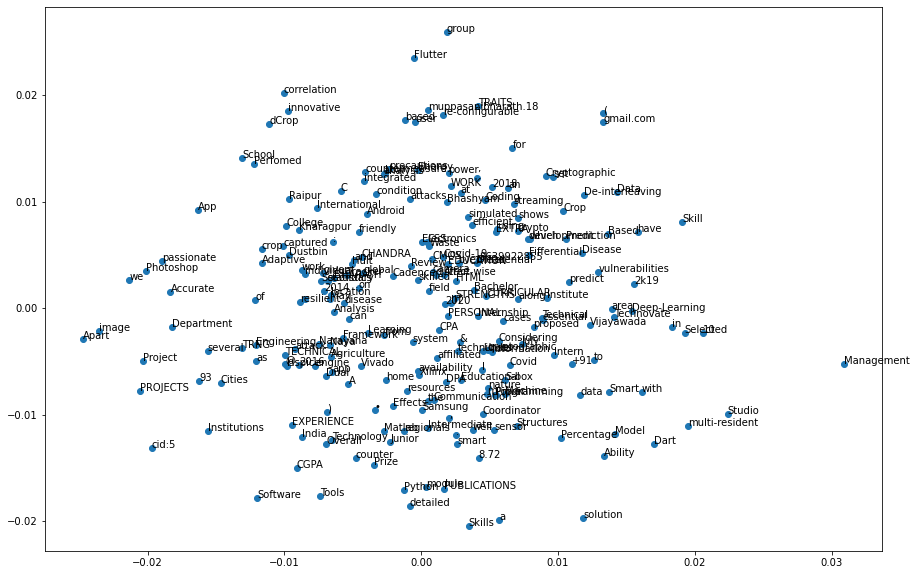

In [62]:
# Plot the points
fig,ax = plt.subplots(figsize=(15,10))
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.index_to_key)

for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.show()

In [63]:
texts = [i for i in proj_lines]
corpus2 = [nltk.word_tokenize(i) for i in texts]

In [64]:
# train model
model = Word2Vec(corpus2, min_count=1)
# summarize the loaded model
print("INFO: Model - \n" + str(model))

INFO: Model - 
Word2Vec<vocab=121, vector_size=100, alpha=0.025>


In [65]:
words = list(model.wv.index_to_key)
print(str(words))

['of', 'Water', 'using', 'Regulations', 'analysis', 'Summarization', '(', ')', '.', 'to', '-', 'South', 'Carolina', 'in', 'Recognition', 'Chatbot', 'and', 'Terms', ':', 'for', 'sentiment', 'based', 'Scientific', 'Predicting', 'the', '2022', 'gubernatorial', 'election', 'Twitter', 'synthesis', 'Regulation', 'New', 'FastText', '[', 'with', 'Election', 'data', ']', 'aspect', 'Artical', 'summary', 'procedure', 'Extracting', 'from', 'solar', 'cell', 'perovskite', 'scientific', 'publications', 'Crime', 'Entity', 'Firearm', 'Services', 'answer', 'Evolving', 'Data', 'TOS', 'Banks', 'Target', 'neighborhoods', 'urban', "'", 'Answering', 'quesries', ',', 'ASR', 'on', 'a', 'Novel', 'Dataset', 'created', 'YouTube', 'Detecting', 'rating', 'severity', 'urgency', 'short', 'one-time', 'Question', 'crisis', 'events', 'vs.', 'ongoing', 'ones', 'Arizona', 'Damaged', 'doc', 'prediction', '10', '%', 'Visual', 'Speech', 'Automatic', 'ANN', 'Networks', 'WHO', 'Verifying', 'various', 'foods', 'connection', 'im

In [66]:
X = []
for word in model.wv.index_to_key:
    X.append(model.wv[word])

In [67]:
pca = PCA(n_components=2)
result = pca.fit_transform(X)

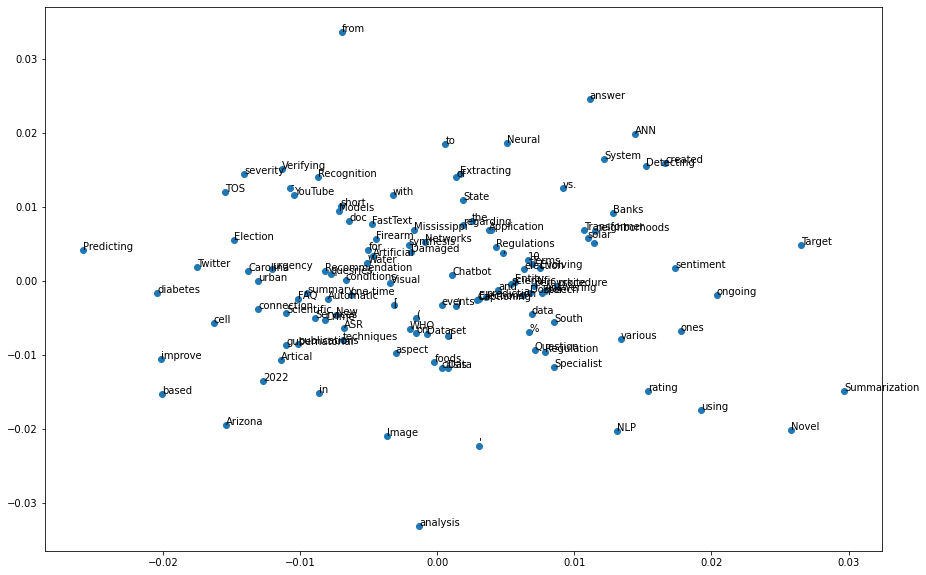

In [68]:
# Plot the points
fig,ax = plt.subplots(figsize=(15,10))
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.index_to_key)

for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.show()

In [44]:
stog = amrlib.load_stog_model(model_dir="C:\\users\\muppa\\anaconda3\\lib\\site-packages\\amrlib\\data\\model_stog\\model_parse_xfm_bart_large-v0_1_0")

In [45]:
graphs = stog.parse_sents(['show me flights from Boston to anywhere that has flights to Dallas'])
for graph in graphs:
    print(graph)

# ::snt show me flights from Boston to anywhere that has flights to Dallas
(s / show-01
      :mode imperative
      :ARG0 (y / you)
      :ARG1 (f / fly-01
            :source (c / city
                  :name (n / name
                        :op1 "Boston"))
            :destination (a / anywhere
                  :ARG0-of (h / have-03
                        :ARG1 (f2 / fly-01
                              :destination (c2 / city
                                    :name (n2 / name
                                          :op1 "Dallas"))))))
      :ARG2 (ii / i))


In [6]:

g = penman.decode("""(s / show-01
      :mode imperative
      :ARG0 (y / you)
      :ARG1 (f / fly-01
            :source (c / city
                  :name (n / name
                        :op1 "Boston"))
            :destination (a / anywhere
                  :ARG0-of (h / have-03
                        :ARG1 (f2 / fly-01
                              :destination (c2 / city
                                    :name (n2 / name
                                          :op1 "Dallas"))))))
      :ARG2 (ii / i))""")

In [7]:
g.triples

[('s', ':instance', 'show-01'),
 ('s', ':mode', 'imperative'),
 ('s', ':ARG0', 'y'),
 ('y', ':instance', 'you'),
 ('s', ':ARG1', 'f'),
 ('f', ':instance', 'fly-01'),
 ('f', ':source', 'c'),
 ('c', ':instance', 'city'),
 ('c', ':name', 'n'),
 ('n', ':instance', 'name'),
 ('n', ':op1', '"Boston"'),
 ('f', ':destination', 'a'),
 ('a', ':instance', 'anywhere'),
 ('h', ':ARG0', 'a'),
 ('h', ':instance', 'have-03'),
 ('h', ':ARG1', 'f2'),
 ('f2', ':instance', 'fly-01'),
 ('f2', ':destination', 'c2'),
 ('c2', ':instance', 'city'),
 ('c2', ':name', 'n2'),
 ('n2', ':instance', 'name'),
 ('n2', ':op1', '"Dallas"'),
 ('s', ':ARG2', 'ii'),
 ('ii', ':instance', 'i')]